In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import neighbors as nb
from sklearn.model_selection import ShuffleSplit

In [2]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [3]:
df=pd.read_csv('../output/risk_factors_cervical_cancer(training).csv')

In [4]:
# data spliting by(80-20)
cancer_target=list(df['target'])
df_heder=list(df)
df_heder=df_heder[0:32]
temp_dict=dict.fromkeys(df_heder)
for i in range(len(df_heder)):
    temp_dict[df_heder[i]]=list(df[df_heder[i]])
cancer_data=pd.DataFrame(temp_dict)

In [5]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

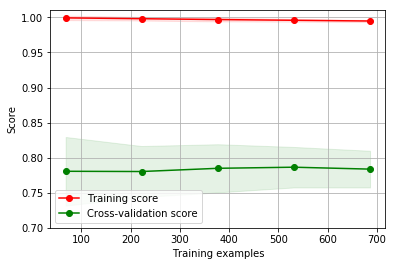

In [6]:
# Decision Tree
title='Learning Curve(Decision Tree)'
estimator = tree.DecisionTreeClassifier(criterion = "entropy")
plot_learning_curve(estimator, '', cancer_data, cancer_target, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.savefig('../output/plot/LC/Decision Tree.png')
plt.show()
plt.close()

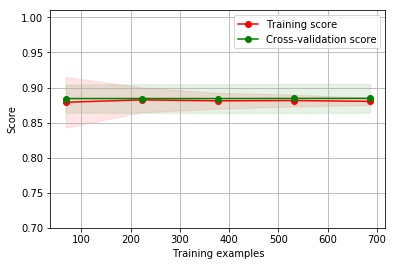

In [10]:
# KNN
title='Learning Curve(KNN)'
estimator = nb.KNeighborsClassifier(n_neighbors=7)
plot_learning_curve(estimator, '', cancer_data, cancer_target, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.savefig('../output/plot/LC/KNN.png')
plt.show()
plt.close()

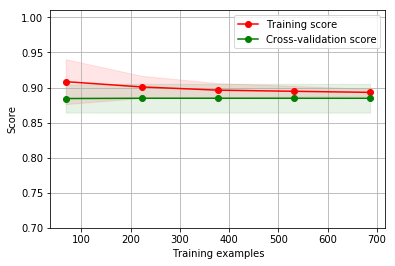

In [8]:
# SVM
title='Learning Curve(SVM)'
estimator = SVC()
plot_learning_curve(estimator, '', cancer_data, cancer_target, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.savefig('../output/plot/LC/SVM.png')
plt.show()
plt.close()